This is how I trained my agents

Training with best agent...


Training with island model: 100%|██████████| 100/100 [30:53<00:00, 18.54s/it]


Crowd player created
Crowd player created
Crowd player created
Crowd player created
Crowd player created


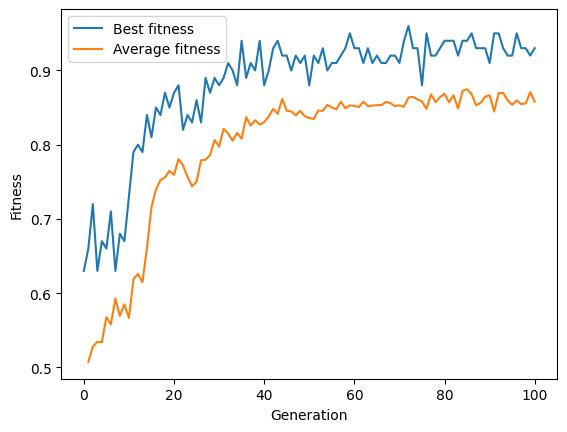

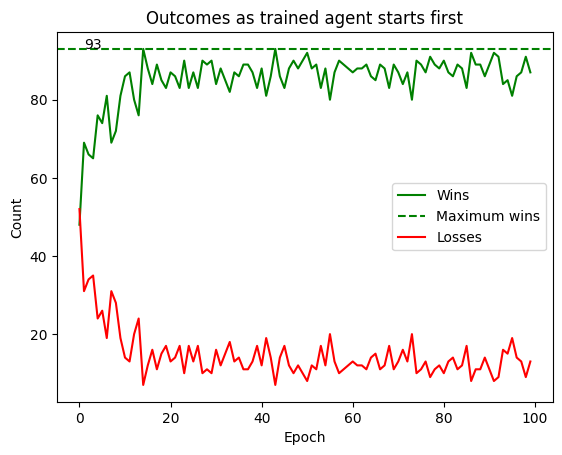

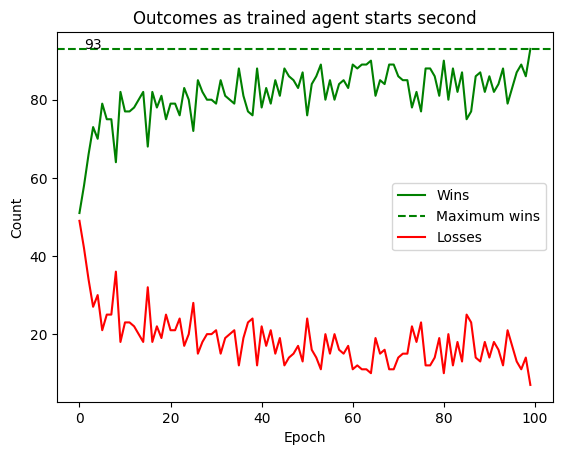

Testing: 100%|██████████| 100/100 [00:07<00:00, 14.14it/s]

Wins starting first: 0.87
Wins starting second: 0.83


In [4]:
from core import EvolutionTask, QLTask, EvolutionaryPlayer, RandomPlayer, CrowdPlayer, fitness, test

# task = QLTask(num_matches=100000, test_freq=1000, test_matches=100, test_agent='random', lr=0.5, df=0.8)
# task.train()
try:
    print('Training with best agent...')
    opponent = EvolutionaryPlayer(path='best_agent.npy')
except:
    print('Training with random player...')
    opponent = RandomPlayer()
fit = lambda x: fitness(x, 50, opponent=RandomPlayer())
task = EvolutionTask(fit, test_freq=1, period_true_fitness=1, self_play=False)
task.es(n_generations=100, population_size=1000, mu=300, p=0.01)
task.island_model(p=0.01, mode='es', n_islands=3, island_size=30, mu_island=10, n_generations=100, migration_period=10, migration_size=10, hierarchical=True) #91, 86 ensemble
agent = task.best_agent
agent.save('best_agent.npy')
agent = EvolutionaryPlayer(path='best_agent.npy')
agent = task.get_wisdowm_of_crowds_agent()
agent.save('crowd_agent.npy')
agent = CrowdPlayer(path='crowd_agent.npy')
task.plot_fitness()
task.display_stats()
test(agent)

Instead, this is how to load the best Evolutionary agent and test it against a random player for 10000 matches.
To be tested properly, the player attribute id should be set to 0 if starting first, else it should be set to 1. As done in the test function in train.py

In [26]:
from train import EvolutionTask, QLTask, EvolutionaryPlayer, RandomPlayer, CrowdPlayer, fitness, test

agent_es = EvolutionaryPlayer(path='best_agent_es.npy')
test(agent_es, test_matches=10000, opponent=RandomPlayer())

agent_island = EvolutionaryPlayer(path='best_agent_island.npy')
test(agent_island, test_matches=10000, opponent=RandomPlayer())

Testing: 100%|██████████| 10000/10000 [00:28<00:00, 347.88it/s]


Wins starting first: 0.8854
Wins starting second: 0.8526


Testing: 100%|██████████| 10000/10000 [00:30<00:00, 323.67it/s]

Wins starting first: 0.8838
Wins starting second: 0.8376


Crowd agents instead require the class CrowdPlayer. However they are very slow to play, so I advise against testing for a high number of matches.

In [2]:
from train import EvolutionTask, QLTask, EvolutionaryPlayer, RandomPlayer, CrowdPlayer, fitness, test


agent = CrowdPlayer(path='crowd_agent_es.npy')
test(agent, test_matches=100, opponent=RandomPlayer())

Crowd player created


Testing: 100%|██████████| 100/100 [01:14<00:00,  1.34it/s]

Wins starting first: 0.9
Wins starting second: 0.83
